In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

In [2]:
CustomValues = pd.read_csv("Profile_prędkości_V2tsv.txt", sep="\t")
CustomValues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12220 entries, 0 to 12219
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       12220 non-null  float64
 1   wl      12220 non-null  float64
 2   wp      12220 non-null  float64
dtypes: float64(3)
memory usage: 286.5 KB


In [3]:
wl = CustomValues["wl"]
wr = CustomValues["wp"]
t = CustomValues["t"]

In [4]:
initCondi = [0, 0, 0]
r = 0.021
d = 0.073

In [5]:
phi_t = [initCondi[0]]

for i in range(len(t)-1):
    calka = phi_t[i] + np.trapz([(wr[i]-wl[i])*r/d, (wr[i+1]-wl[i+1])*r/d],[t[i], t[i+1]])
    phi_t.append(calka)

In [6]:
x_t = [initCondi[1]]

for i in range(len(t)-1):
    calka = x_t[i] + np.trapz([(wr[i]+wl[i])*r/2*np.cos(phi_t[i]), (wr[i+1]+wl[i+1])*r/2*np.cos(phi_t[i+1])],[t[i], t[i+1]])
    x_t.append(calka)

In [7]:
y_t = [initCondi[2]]

for i in range(len(t)-1):
    calka = y_t[i] + np.trapz([(wr[i]+wl[i])*r/2*np.sin(phi_t[i]), (wr[i+1]+wl[i+1])*r/2*np.sin(phi_t[i+1])],[t[i], t[i+1]])
    y_t.append(calka)

In [8]:
a = 0
b = -0.0725
Pxr = []
Pyr = []

for i in range(len(t)):
    newPx = x_t[i] + np.cos(phi_t[i])*a + (-1)*np.sin(phi_t[i])*b
    Pxr.append(newPx)
    newPy = y_t[i] + np.sin(phi_t[i])*a + np.cos(phi_t[i])*b
    Pyr.append(newPy)

In [9]:
a = 0
b = 0.0725
Pxl = []
Pyl = []

for i in range(len(t)):
    newPx = x_t[i] + np.cos(phi_t[i])*a + (-1)*np.sin(phi_t[i])*b
    Pxl.append(newPx)
    newPy = y_t[i] + np.sin(phi_t[i])*a + np.cos(phi_t[i])*b
    Pyl.append(newPy)

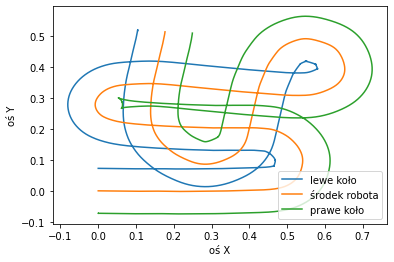

In [10]:
plt.plot(Pxl,Pyl, label="lewe koło")
plt.plot(x_t, y_t, label="środek robota")
plt.plot(Pxr,Pyr, label="prawe koło")

plt.xlabel("oś X")
plt.ylabel("oś Y")
plt.legend(loc=4)
#plt.savefig("5.pdf", format='pdf')
